In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus

In [21]:
#loading the data
tests_df = pd.read_csv('tests_data.csv')
tests_df.head()

,ANTIGENNEGATIVE,ANTIGENPOSITIVE,DATE,PCRINCONCLUSIVE,PCRNEGATIVE,PCRPOSITIVE,POSITIVITYRATE,POSITIVITYRATEROLLINGAVG,SEROLOGYINCONCLUSIVE,SEROLOGYNEGATIVE,SEROLOGYPOSITIVE,TOTALNEGATIVE,TOTALPOSITIVE
0,0,0,03-03-2020,0,0,1,100.0,0.0,0,0,0,0,1
1,0,0,03-04-2020,0,0,0,0.0,0.0,0,0,0,0,0
2,0,0,03-05-2020,0,0,0,0.0,0.0,0,0,0,0,0
3,0,0,03-06-2020,0,1,0,0.0,0.0,0,0,0,1,0
4,0,0,03-07-2020,0,0,0,0.0,0.0,0,0,0,0,0


In [22]:
tests_df.dtypes

ANTIGENNEGATIVE               int64
ANTIGENPOSITIVE               int64
DATE                         object
PCRINCONCLUSIVE               int64
PCRNEGATIVE                   int64
PCRPOSITIVE                   int64
POSITIVITYRATE              float64
POSITIVITYRATEROLLINGAVG    float64
SEROLOGYINCONCLUSIVE          int64
SEROLOGYNEGATIVE              int64
SEROLOGYPOSITIVE              int64
TOTALNEGATIVE                 int64
TOTALPOSITIVE                 int64
dtype: object

In [26]:
tests_df["date"]=tests_df["DATE"].astype('datetime64')

In [27]:
tests_df.dtypes

ANTIGENNEGATIVE                      int64
ANTIGENPOSITIVE                      int64
DATE                                object
PCRINCONCLUSIVE                      int64
PCRNEGATIVE                          int64
PCRPOSITIVE                          int64
POSITIVITYRATE                     float64
POSITIVITYRATEROLLINGAVG           float64
SEROLOGYINCONCLUSIVE                 int64
SEROLOGYNEGATIVE                     int64
SEROLOGYPOSITIVE                     int64
TOTALNEGATIVE                        int64
TOTALPOSITIVE                        int64
date                        datetime64[ns]
dtype: object

In [28]:
tests_df.drop("DATE", axis = 1)

,ANTIGENNEGATIVE,ANTIGENPOSITIVE,PCRINCONCLUSIVE,PCRNEGATIVE,PCRPOSITIVE,POSITIVITYRATE,POSITIVITYRATEROLLINGAVG,SEROLOGYINCONCLUSIVE,SEROLOGYNEGATIVE,SEROLOGYPOSITIVE,TOTALNEGATIVE,TOTALPOSITIVE,date
0,0,0,0,0,1,100.000000,0.0,0,0,0,0,1,2020-03-03
1,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,2020-03-04
2,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,2020-03-05
3,0,0,0,1,0,0.000000,0.0,0,0,0,1,0,2020-03-06
4,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,2020-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,190,25,0,464,49,9.551657,10.3,0,5,2,659,76,2021-07-13
498,222,22,0,416,48,10.344828,10.7,0,6,1,644,71,2021-07-14
499,172,21,0,293,52,15.072464,11.1,0,2,0,467,73,2021-07-15
500,9,2,0,54,4,6.896552,10.8,0,1,0,64,6,2021-07-16


In [35]:
tests_df['month'] = pd.DatetimeIndex(tests_df['date']).month
tests_df['year'] = pd.DatetimeIndex(tests_df['date']).year
no_date = tests_df.drop(["DATE", "date"], axis = 1)
no_date

,ANTIGENNEGATIVE,ANTIGENPOSITIVE,PCRINCONCLUSIVE,PCRNEGATIVE,PCRPOSITIVE,POSITIVITYRATE,POSITIVITYRATEROLLINGAVG,SEROLOGYINCONCLUSIVE,SEROLOGYNEGATIVE,SEROLOGYPOSITIVE,TOTALNEGATIVE,TOTALPOSITIVE,month,year
0,0,0,0,0,1,100.000000,0.0,0,0,0,0,1,3,2020
1,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,3,2020
2,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,3,2020
3,0,0,0,1,0,0.000000,0.0,0,0,0,1,0,3,2020
4,0,0,0,0,0,0.000000,0.0,0,0,0,0,0,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,190,25,0,464,49,9.551657,10.3,0,5,2,659,76,7,2021
498,222,22,0,416,48,10.344828,10.7,0,6,1,644,71,7,2021
499,172,21,0,293,52,15.072464,11.1,0,2,0,467,73,7,2021
500,9,2,0,54,4,6.896552,10.8,0,1,0,64,6,7,2021


In [52]:
#selecting the best features to use, selecting those with a score of "1"
from sklearn.feature_selection import RFE
X = no_date.drop('POSITIVITYRATE',axis=1)
y = no_date['POSITIVITYRATE']

rfe = RFE(reg,n_features_to_select=7)
rfe_ = rfe.fit(X, y)
print(X.columns)
print(rfe_.support_)
print(rfe.ranking_)

Index(['ANTIGENNEGATIVE', 'ANTIGENPOSITIVE', 'PCRINCONCLUSIVE', 'PCRNEGATIVE',
       'PCRPOSITIVE', 'POSITIVITYRATEROLLINGAVG', 'SEROLOGYINCONCLUSIVE',
       'SEROLOGYNEGATIVE', 'SEROLOGYPOSITIVE', 'TOTALNEGATIVE',
       'TOTALPOSITIVE', 'month', 'year'],
      dtype='object')
[False False  True False False  True  True  True  True False False  True
  True]
[4 3 1 7 2 1 1 1 1 5 6 1 1]


In [53]:
#dropping the columns that are not useful
clean_df=no_date.drop(["ANTIGENNEGATIVE", "ANTIGENPOSITIVE","PCRNEGATIVE", "PCRPOSITIVE",
                      "TOTALNEGATIVE", "TOTALPOSITIVE" ], axis = 1)

In [38]:
clean_df.head()

,PCRINCONCLUSIVE,POSITIVITYRATE,POSITIVITYRATEROLLINGAVG,SEROLOGYINCONCLUSIVE,SEROLOGYNEGATIVE,SEROLOGYPOSITIVE,month,year
0,0,100.0,0.0,0,0,0,3,2020
1,0,0.0,0.0,0,0,0,3,2020
2,0,0.0,0.0,0,0,0,3,2020
3,0,0.0,0.0,0,0,0,3,2020
4,0,0.0,0.0,0,0,0,3,2020


<AxesSubplot:>

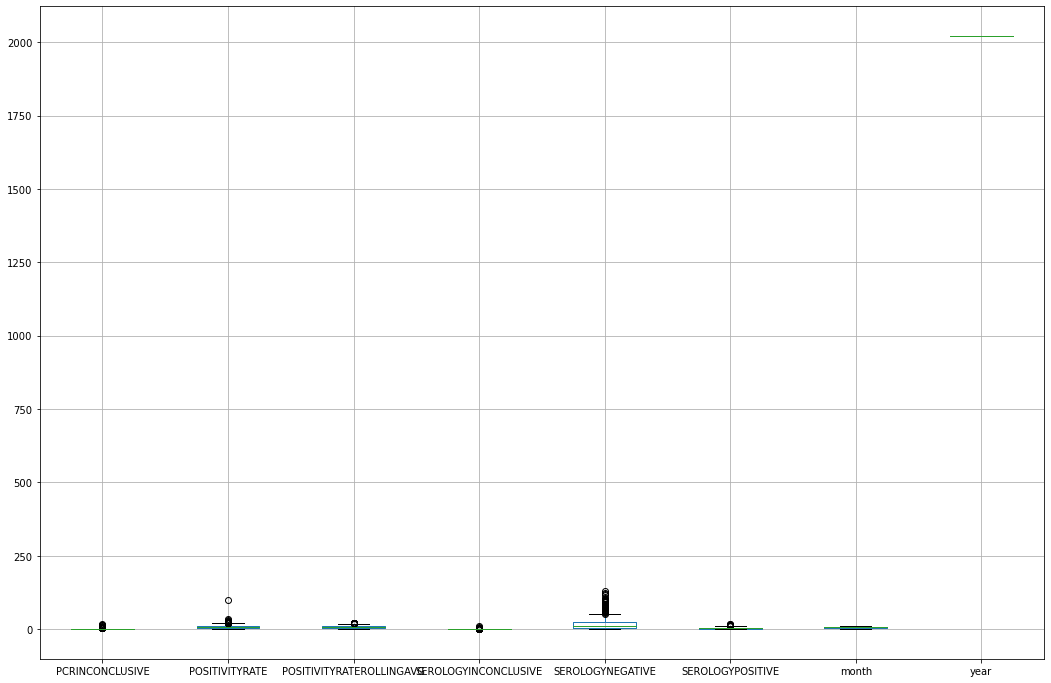

In [56]:
#checking the outliers
clean_df.boxplot(figsize=(18,12))

In [59]:
for x in ['PCRINCONCLUSIVE','POSITIVITYRATE', 'POSITIVITYRATEROLLINGAVG', 'SEROLOGYINCONCLUSIVE', 'SEROLOGYNEGATIVE', 'SEROLOGYPOSITIVE']:
    q75,q25 = np.percentile(clean_df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    clean_df.loc[clean_df[x] < min,x] = np.nan
    clean_df.loc[clean_df[x] > max,x] = np.nan

In [62]:
clean2 = clean_df.dropna(axis=0)
clean2

,PCRINCONCLUSIVE,POSITIVITYRATE,POSITIVITYRATEROLLINGAVG,SEROLOGYINCONCLUSIVE,SEROLOGYNEGATIVE,SEROLOGYPOSITIVE,month,year
1,0.0,0.000000,0.0,0.0,0.0,0.0,3,2020
2,0.0,0.000000,0.0,0.0,0.0,0.0,3,2020
3,0.0,0.000000,0.0,0.0,0.0,0.0,3,2020
4,0.0,0.000000,0.0,0.0,0.0,0.0,3,2020
5,0.0,0.000000,0.0,0.0,0.0,0.0,3,2020
...,...,...,...,...,...,...,...,...
497,0.0,9.551657,10.3,0.0,5.0,2.0,7,2021
498,0.0,10.344828,10.7,0.0,6.0,1.0,7,2021
499,0.0,15.072464,11.1,0.0,2.0,0.0,7,2021
500,0.0,6.896552,10.8,0.0,1.0,0.0,7,2021


In [63]:
X = clean2.drop('POSITIVITYRATE',axis=1)
y = clean2['POSITIVITYRATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [104]:
y_pred = reg.predict(X_test)
y_pred

array([17.12555379,  4.22128774,  8.61355939, 12.73192771,  5.13356352,
        4.71578896,  5.50007569, 13.27032751, 13.15611561, 11.52930811,
        9.1123166 ,  6.27660761,  7.85170066,  4.67067792,  3.69576867,
        4.87247646,  6.33218284,  7.7485281 ,  9.0789655 ,  4.5253095 ,
        6.48168597,  5.00421461,  6.89483693, 11.80483403,  0.59740294,
        6.51374337,  3.98847057,  8.74686721, 12.68053823,  8.60164827,
       13.48337823,  4.93917794,  6.43071651,  8.00776554,  4.9281873 ,
        5.43073943, 14.94308383,  2.88098056, 10.11781288,  5.14652201,
       15.84315274, 12.68422563, 12.74112354, 14.72042055,  6.07361648,
        8.25617468,  4.45306326, 10.14101318,  6.13781181,  4.98910804,
        7.35326446,  4.30496411,  7.52372106, 10.12381078,  5.8935363 ,
        3.15450886,  0.59740294,  5.62122702,  8.38736332, 13.31880545,
        4.77533163,  7.09887206,  6.26641406,  0.59740294,  9.09135212,
        4.73218051,  4.0446719 ])

In [65]:
accuracy_score = reg.score(X_test, y_test)
accuracy_score

0.8051887891288229

In [68]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

4.342318377286387
0.8051887891288229


### Random Forest

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(clean2), columns = clean2.columns)
scaled.var()

PCRINCONCLUSIVE             1.003003
POSITIVITYRATE              1.003003
POSITIVITYRATEROLLINGAVG    1.003003
SEROLOGYINCONCLUSIVE        0.000000
SEROLOGYNEGATIVE            1.003003
SEROLOGYPOSITIVE            1.003003
month                       1.003003
year                        1.003003
dtype: float64

In [100]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth =3, random_state =42, min_samples_leaf=7)


X = clean2.drop('POSITIVITYRATE',axis=1)
y = clean2['POSITIVITYRATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8054665827525811

In [103]:
y_pred = rf.predict(X_test)
y_pred

array([15.74509835,  2.39889103,  8.64291408, 12.65653149,  5.24895499,
        4.43694346,  5.55457224, 13.79709905, 14.39820483, 11.75696114,
       10.1827398 ,  5.68454972,  7.48470272,  4.74872797,  4.38389623,
        4.60617862,  5.80277416,  6.91670485,  9.9577503 ,  4.74358841,
        5.35666853,  4.89510253,  6.83129866, 11.75696114,  1.96535587,
        5.3767854 ,  4.53223555,  8.99858254, 13.66373287,  8.44753394,
       14.03550843,  4.58528278,  6.68907027,  7.72989132,  4.7348145 ,
        4.86267981, 14.88545707,  2.61648594, 10.30091452,  4.90473841,
       15.70275964, 12.39572373, 12.02022583, 14.78497125,  5.65154682,
        8.64291408,  4.74358841,  9.45831483,  6.02410743,  4.58528278,
        7.02015636,  5.103634  ,  8.89408214, 10.46670665,  5.24895499,
        2.61648594,  1.96535587,  5.73036159,  8.32052788, 13.74361975,
        4.51430678,  7.2378281 ,  5.74208507,  1.96535587,  9.38966423,
        4.19182848,  4.74872797])

In [102]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

4.336126390941533
0.8054665827525811
